# Facial Expression Detection using Convolutional Neural Networks 🤖📷

Facial expression detection is a fascinating field within computer vision that involves the recognition and interpretation of human emotions based on facial expressions. In this Jupyter Notebook, we'll build a Facial Expression Detection model using Convolutional Neural Networks (CNNs). This model will be trained to classify facial expressions into different emotion categories, such as happiness, sadness, anger, etc. 😊😢😠

### Goal 🚀💻
The primary goal of this project is to create an effective facial expression detection system that can be integrated into various applications, including human-computer interaction, virtual reality, and emotion-aware technology.

### Tools & Libraries 🛠️

We will be using the below tools and libriaries for our implementation
- TensorFlow: An open-source machine learning framework that includes tools for building and training deep learning models.
- Keras: A high-level neural network API that runs on top of TensorFlow, making it easier to build and experiment with deep learning models.
- Matplotlib: A visualisation library 📊🐍

## Implementation Steps
1. **Environment setup:** 
2. **Import necessary libraries:**
3. **Dataset collection:**
4. **Data Augmentation:**
5. **CNN model building:**
6. **Model training:**
7. **Model evaluation:**

Throughout the notebook, we'll provide detailed explanations, code snippets and visualizations to ensure a clear understanding of the entire process. 🧠🛠️

Let's get started! 🚀🚀🚀🚀

## Step 1: Environment setup
Ensure all necessary libraries are installed. Installation can be achieved using the below command

In [ ]:
# Use the pip to install the necessary libraries
# !pip install tensorflow
# !pip install numpy
# !pip install matplotlib
# !pip install opencv-python


# The below code snippet is used to check the versions of the libraries
import tensorflow as tf
import numpy as np
import matplotlib
import cv2

print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("OpenCV version:", cv2.__version__)




## Step 2: Import necessary libraries

Import all required libraries in this section of your notebook. It is always good practice to keep your code tidy and well structured.

In [1]:
# operating system libraries
import os
import random

# Open Computer vision libraries
import cv2 as cv

# File operation libraries
import shutil
import yaml

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# visualization libraries
import matplotlib.pyplot as plt

## Step 3: Dataset collection

For the purpose this exercise, we will use facial expression dataset named **[AffectNeT](https://www.kaggle.com/datasets/fatihkgg/affectnet-yolo-format/download?datasetVersionNumber=2)** from Kaggle. 
The **[AffectNeT](https://www.kaggle.com/datasets/fatihkgg/affectnet-yolo-format/download?datasetVersionNumber=2)** dataset is intended for use in YOLO projects involving facial expression recognition.

According to the instructions on the Kaggle website, the entire data set is separated into train-test-validation folders with modified image names and matching txt files with annotations. All images are exactly 96 x 96 pixels.

The dataset is shuffled and divided into three parts:

- train (0.7)
- validation (0.2)
- test (0.1)


There are 8 emotion classes which are mapped as:
- 0- Anger
- 1- Contempt
- 2- Disgust
- 3- Fear
- 4- Happy
- 5- Neutral
- 6- Sad
- 7- Surprise

In [2]:
# Define dataset directory
dataset_dir = "dataset/YOLO_format"

# Define image subdirectories for test, train, validation sets
train_image_dir = os.path.join(dataset_dir, "train", "images")
valid_image_dir = os.path.join(dataset_dir, "valid", "images")
test_image_dir = os.path.join(dataset_dir, "test", "images")

# Define label subdirectories for test, train, validation sets
train_label_dir = os.path.join(dataset_dir, "train", "labels")
valid_label_dir = os.path.join(dataset_dir, "valid", "labels")
test_label_dir = os.path.join(dataset_dir, "test", "labels")

# Lets try and list the image files in each directory
train_images = os.listdir(train_image_dir)
valid_images = os.listdir(valid_image_dir)
test_images = os.listdir(test_image_dir)


In [3]:
# Create a function to display some sample images from each directory
def display_images(directory, images):
    plt.figure(figsize=(8, 8))
    
    # Display 9 random images
    random_images = random.sample(images, 9)
    
    for i in range(9):
        plt.subplot(3, 3, i+1)
        img_path = os.path.join(directory, random_images[i])
        
        # Read image using cv.imread
        img = cv.imread(img_path)
        
        # OpenCV loads images in BGR, thus we need to convert to RGB
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        
        # Plot image using matplotlib
        plt.imshow(img)
        plt.axis('off')
        plt.title(images[i])
        

### Image Display

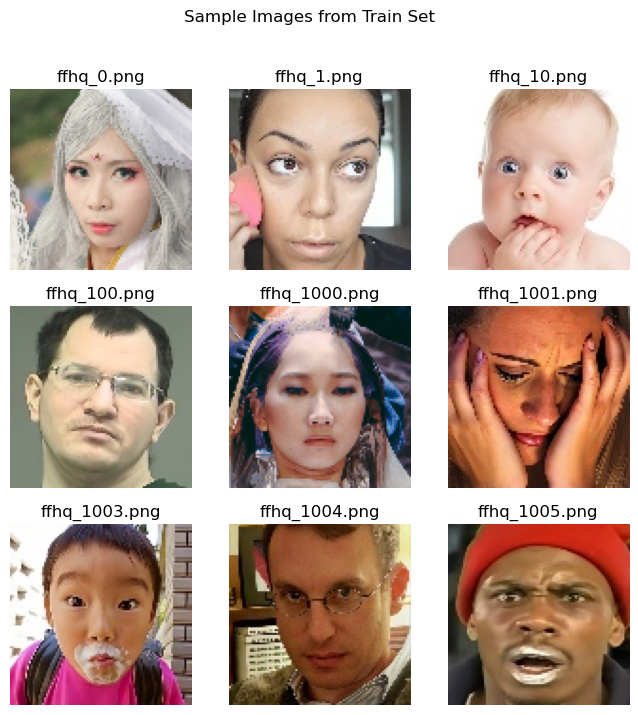

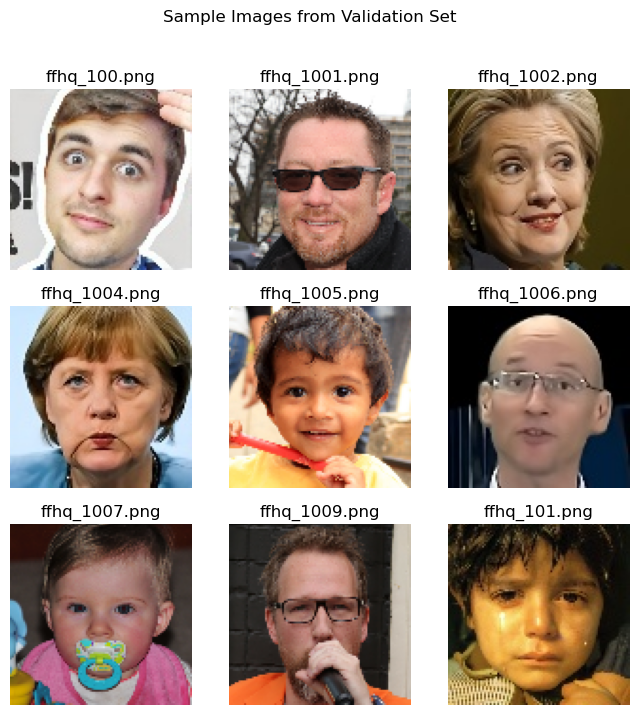

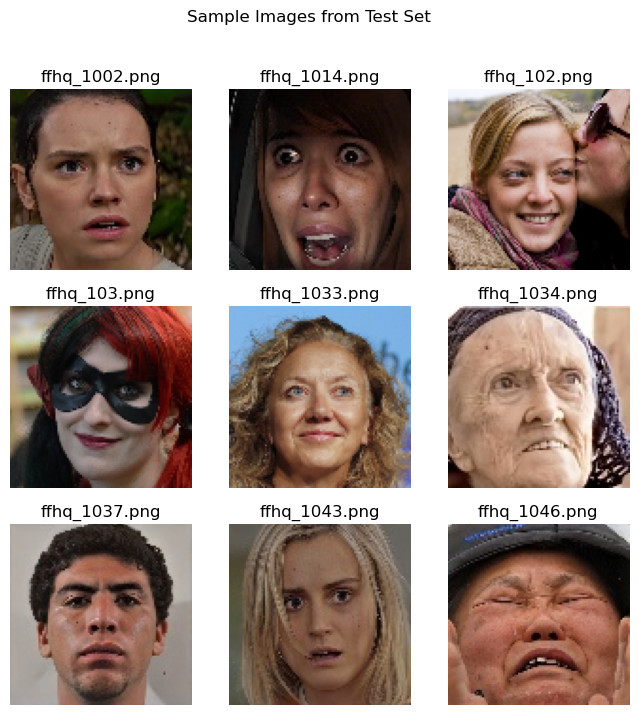

In [4]:
# Display train set images
display_images(train_image_dir, train_images)
plt.suptitle('Sample Images from Train Set')
plt.show()

# Display validation set images
display_images(valid_image_dir, valid_images)
plt.suptitle('Sample Images from Validation Set')
plt.show()

# Display Test set images
display_images(test_image_dir, test_images)
plt.suptitle('Sample Images from Test Set')
plt.show()



### 3.1 Organize YOLO_format dataset into their respective classes as defined in data.yaml
The original data.yaml has been modified to reflect my directory paths for the extracted images.

In [ ]:
# Lets define label mapping
labels_map = {
    0 : 'Anger',
    1 : 'Contempt',
    2 : 'Disgust',
    3 : 'Fear',
    4 : 'Happy',
    5 : 'Neutral',
    6 : 'Sad',
    7 : 'Suprise'
}

In [ ]:
# Lets create a couple of functions to carry out this activity.

def create_yolo_datasets(data_path, output_path):
    with open(data_path, 'r') as yaml_file:
        data_file = yaml.safe_load(yaml_file)

        # Define paths
        train_path = os.path.join(output_path, 'train')
        valid_path = os.path.join(output_path, 'valid')
        test_path = os.path.join(output_path, 'test')

        # Create output directories
        os.makedirs(train_path, exist_ok=True)
        os.makedirs(valid_path, exist_ok=True)
        os.makedirs(test_path, exist_ok=True)

        # Organize images into subdirectories based on class names
        organize_images_by_class(data_file['train'], train_path)
        organize_images_by_class(data_file['valid'], valid_path)
        organize_images_by_class(data_file['test'], test_path)

        # Create class names file
        create_classes_file(data_file['names'], output_path)
        
def organize_images_by_class(image_dir, label_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    
    images = os.listdir(image_dir)
       
    for image in images:
        image_path = os.path.join(image_dir, image)
        
        # Extract class label from the label file content
        label_
        
        
    

### Build YOLO datasets

In [ ]:
# Define paths
data_yaml_path = "dataset/YOLO_format/data.yaml"
output_dataset_path = "dataset/yolo_dataset"

# Build YOLO datasets
create_yolo_datasets(data_yaml_path, output_dataset_path)

## Step 4: Data Augmentation:
The data augmentation helps to increase the diversity of the training dataset, thus improving the generalization of the model. TensorFlow provides

The images have different backgrounds which can interfere with the model performance. We need to focus only on the Region Of Interest (ROI) which is the face.

We will use pre-trained **[Haar-cascade](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)** face classifier from OpenCV for face detection.


### Remove noisy background

The below code is an adaptation from the tutorial code on **[Haar-cascade](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)** website.

In [ ]:
# Load the pre-trained Haar-cascade face classifier from OpenCV
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_alt.xml')

# Function to extract face from iamge
def extract_face(img_path):
    img = cv.imread(img_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Detect face in the image
    face = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=2)
    
    # Extract ROI for each face
    extracted_face = [img[y:y+h, x:x+w] for (x, y, w, h) in face]
    
    return extracted_face

# Function to display sample images with extracted face.
def display_image_with_face(directory, images):
    plt.figure(figsize=(8, 8))
    
    # Display 9 random images
    random_images = random.sample(images, 9)
    
    for i in range(9):
        plt.subplot(3, 3, i+1)
        img_path = os.path.join(directory, random_images[i])
        extracted_face = extract_face(img_path)
        
        if extracted_face:
            # Display the first extracted face
            plt.imshow(cv.cvtColor(extracted_face[0], cv.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(random_images[i])    

### Image Display of Extracted face

In [ ]:
# Display train set images with extracted faces
display_image_with_face(train_dir, train_images)
plt.suptitle('Sample Images from Train Set with Extracted Faces')
plt.show()

# Display validation set images with extracted faces
display_image_with_face(valid_dir, valid_images)
plt.suptitle('Sample Images from Validation Set with Extracted Faces')
plt.show()

### Data augmentation

In [ ]:
# Data augmentation parameters for training sets
train_datagen = ImageDataGenerator (
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation for validation and test sets (usually no augmentation is necessary for these data sets)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess a sample image for demonstration
sample_img_path = os.path.join(train_dir, train_images[0])
sample_img = extract_face(sample_img_path)
sample_img = cv.cvtColor(sample_img[0], cv.COLOR_BGR2RGB)
sample_img = sample_img.reshape((1,) + sample_img.shape) # Reshape to (1, height, width, channels)

# Display original and augmented images for comparison
plt.figure(figsize=(8, 8))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(sample_img[0])
plt.title('Original Image')
plt.axis('off')

# Augmented image
for i, augmented_img in enumerate(train_datagen.flow(sample_img, batch_size=1)):
    plt.subplot(1, 4, i + 2)
    plt.imshow(augmented_img[0])
    plt.title(f'Augmented Image {i + 1}')
    plt.axis('off')
    
    # Lets Display three augmented images for demonstration
    if i == 2:
        break

plt.tight_layout()
plt.show()

### Image generators

In [ ]:
# Create generator for training, validation, and test sets

image_size = (96, 96) # We maintain original sizes of images.
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True # Enable shuffle to make model more robust
)

In [ ]:
train_dir